# Getting started with starfinder

This tutorial will walk through some of the ways you can use `starfinder`. First, let's get started by importing the modules. If the following lines do not run, you will need to follow the [installation instructions](https://starfinder.readthedocs.io/en/latest/).

In [1]:
import astropy
import starfinder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Next, it is useful to know which version of `starfinder` you are using. This can be found by printing the `__version__` attribute:

In [2]:
print(starfinder.__version__)

0.1.dev13+g78f20f7.d20250204


Finally, if you are running things in a notebook, you will need to run the following line to get interactive inline plots:

In [3]:
%matplotlib ipympl

Note: If this fails, you may wish to fall back to `%matplotlib inline`

## Obtaining an example fits file

Here we will use an example image file of NGC 744 included in the examples directory:

In [4]:
image_file = "data/ngc744-0001_60s_v.fit"

## Starfinder setup

Now, we instantiate a `StarField` with the path to the image file. In the initialisation, `StarField` will read the file and store the data.

In [5]:
sf = starfinder.StarField(image_file)

INFO:starfinder:Reading file data/ngc744-0001_60s_v.fit


In [6]:
sf.setup_sky_coordinates()

INFO:starfinder:Using WCS information from the fits file header


Coordinate data for data/ngc744-0001_60s_v.fit:
Right Ascension (RA): 29.677785978102087 degrees
Declination (Dec): 55.48528512918798 degrees
Latitude: 51.42663 degrees
Longitude: -0.5637 degrees
Date and Time (UTC): 2025-01-09T18:14:35.200
Altitude: 83.89884638050958 degrees
Azimuth: 43.78322276298629 degrees


## Plotting the data
You can access the data from the attribute `n_ij`. For example, you could just plot the data using `imshow`:

/opt/homebrew/anaconda3/envs/sf/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


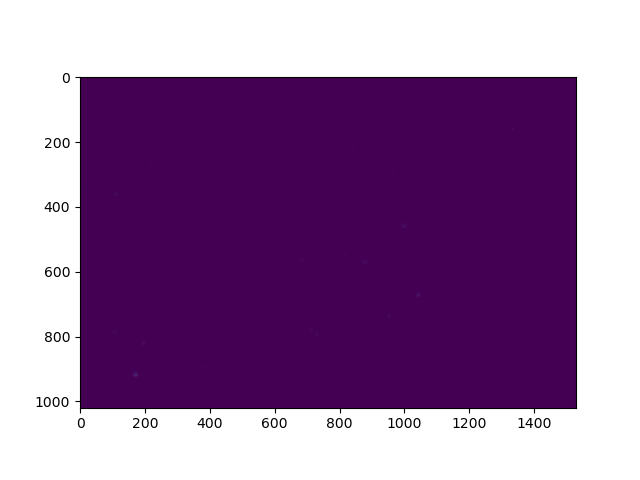

In [7]:
fig, ax = plt.subplots()
ax.imshow(sf.n_ij, origin="upper")
plt.show()

You will notice that we can't see very much in this image (if you squint you'll be able to see a few bright spots). To understand why, let's make a histogram of the data 

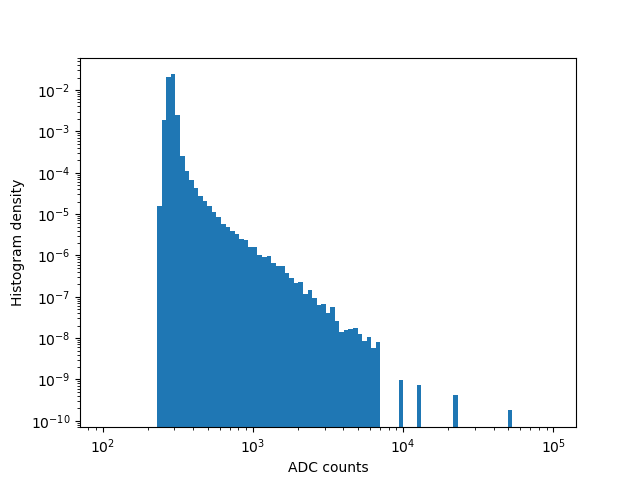

In [8]:
# First flatten the 2D array
values = sf.n_ij.flatten()

# Create a histogram with logarithmic bins
fig, ax = plt.subplots()
ax.hist(values, bins=10**np.linspace(2, 5, 100), density=True)
ax.set(xscale='log', yscale='log', xlabel="ADC counts", ylabel="Histogram density")
plt.show()

What we can identify from this figure is that there are a few "hot" pixels with values greater than $10^4$. Because of this, the `imshow` call doesn't show any of the detail (in a sense, the color map is saturated). To fix this, we can threshold the hot pixels using the `threshold_hot_pixels` method. The second argument is the *quantile* to use for the threshold: 

In [9]:
sf.n_ij = sf.threshold_hot_pixels(sf.n_ij, 0.999)

Okay, now let's try `imshow` again.

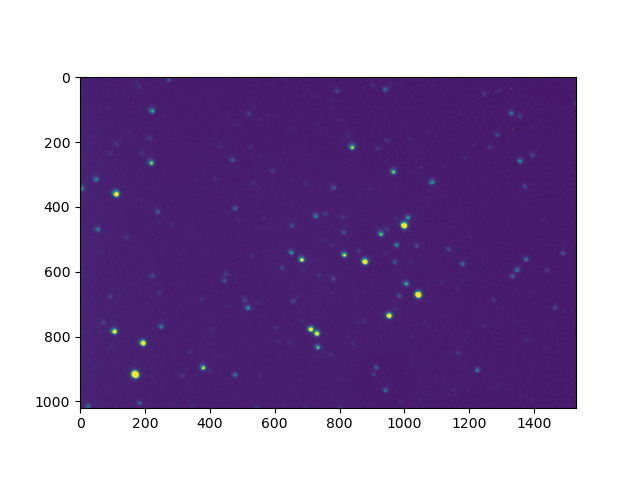

In [10]:
fig, ax = plt.subplots()
ax.imshow(sf.n_ij, origin="upper")
plt.show()

## Plotting using sky coordinates

If the `fits` file has a world coordinate system (WCS) header, `starfinder` can help with setting up the correct projection. To check if this is the case, you can run

In [11]:
sf.has_wcs_header()

True

If this is false, you can run `setup_sky_coordinates()` and provide the `astronometry_api_key` key [obtained from this site](https://nova.astrometry.net/api_help). You can also add the add the WCS information to the `fits` file manually.

If it is true, then we can provide the `projection` argument when setting up a matplotlib axes, this will then automate the process of adding the sky coordinates:

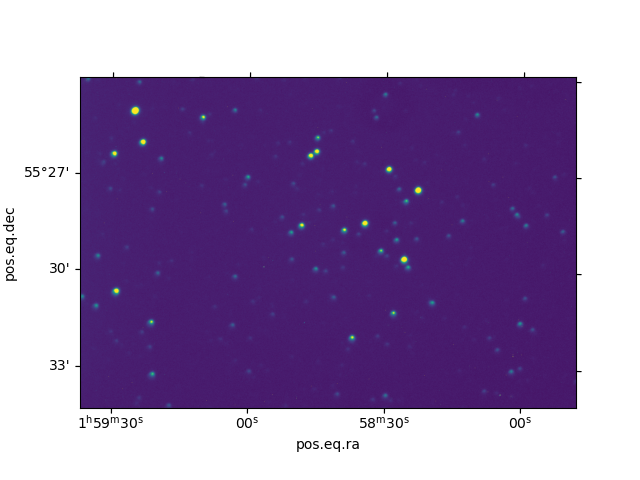

In [12]:
fig, ax = plt.subplots(subplot_kw=dict(projection=sf.get_sky_projection()))
ax.imshow(sf.n_ij)
plt.show()

By default, the axes use a somewhat confusing tick labelling system. Therefore we have provided a convenience function to adjust these

/opt/homebrew/anaconda3/envs/sf/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


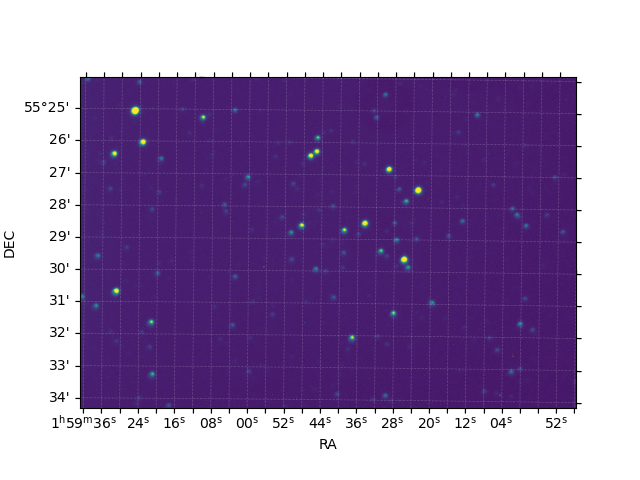

In [13]:
fig, ax = plt.subplots(subplot_kw=dict(projection=sf.get_sky_projection()))
ax.imshow(sf.n_ij)
sf.setup_sky_ax(ax)
plt.show()

## Adding a colorbar

/opt/homebrew/anaconda3/envs/sf/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


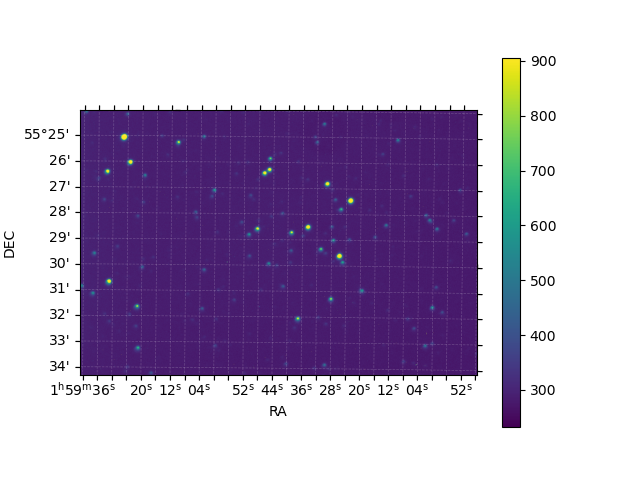

In [14]:
fig, ax = plt.subplots(subplot_kw=dict(projection=sf.get_sky_projection()))
cbar = ax.imshow(sf.n_ij)
sf.setup_sky_ax(ax)
plt.colorbar(cbar)
plt.show()

## Setting a useable region

Sometimes, the edges of the images are not useable for science (e.g. due to incomplete cooling). `starfinder` provides a method to set a useable region. Below, we show how to set this useable region and then overplot it.

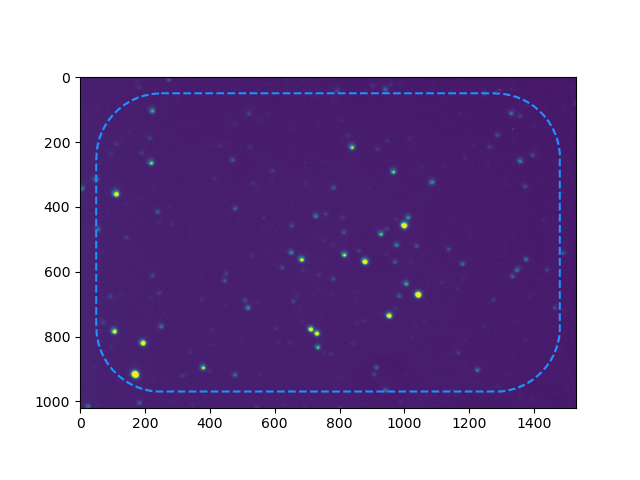

In [18]:
sf.set_usable_region(left=50, top=50, bottom=50, right=50, corner_radius=200)

fig, ax = plt.subplots()
cbar = ax.imshow(sf.n_ij)
sf.add_usable_region_to_ax(ax)
plt.show()